In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
import math
sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import SpatialMetrics

In [9]:
dataset_id = 'bdb'

In [10]:
df = SpatialMetrics.aggregated_ar('git', dataset_id)
n_revisions = df.shape[0]

data = []
for r in df.as_matrix():
    data.append(r[~np.isnan(r)])

In [11]:
def styleBoxplot(bp, ax):
    # change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set(color='#FFFFFF', linewidth=.1)
        # change fill color
        box.set(facecolor='#AAAAAA')
    for median in bp['medians']:
        median.set(color='#000000', linewidth=1)
    for whisker in bp['whiskers']:
        whisker.set(color='#DDDDDD', linestyle='-')
    for cap in bp['caps']:
        cap.set(color='#DDDDDD', linewidth=1)
        
    # Set only 3 ticks
    ax.set_xticks([1, n_revisions / 2, n_revisions], minor=False)
    ax.set_xticklabels([1, int(n_revisions / 2), n_revisions], fontdict=None, minor=False)
    
    ax.set_ylim([0, .75])
    ax.set_yticks([0, .25, .5, .75], minor=False)
    ax.set_yticklabels([0, .25, .5, .75], fontdict=None, minor=False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off', left='off')

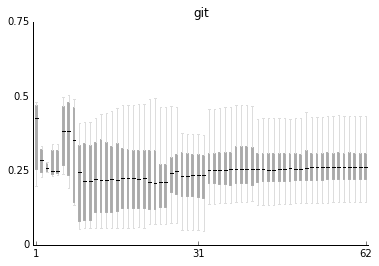

In [12]:
fig = plt.figure()
bp = plt.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, meanline=True);
styleBoxplot(bp, plt.gca())
plt.title('git')

In [13]:
def cm2inch(value):
    return value/2.54

# Aspect ratio boxplots

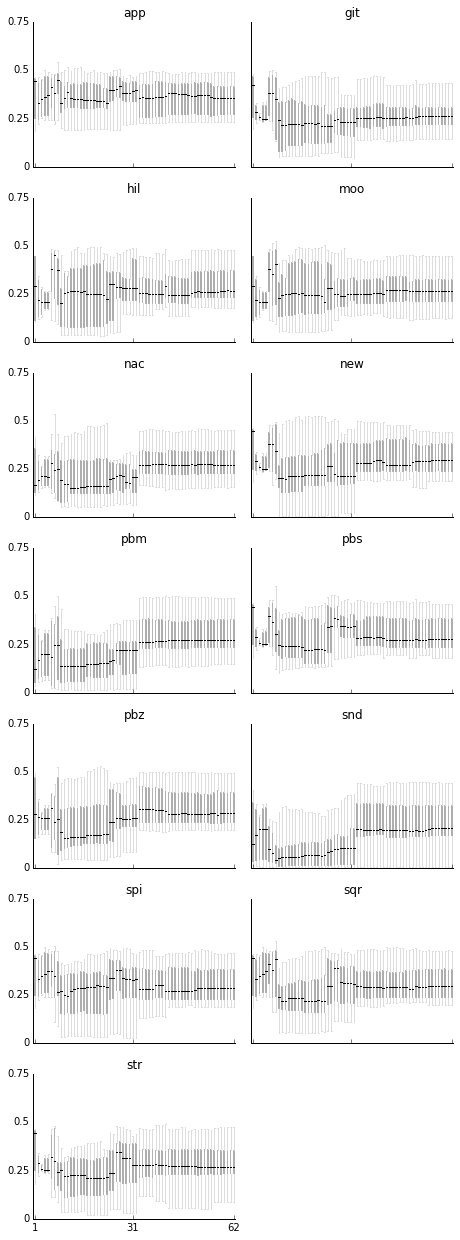

In [20]:
technique_list = Parser.list_techniques()
nrow = 7
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(16.5), cm2inch(2*22)))
fig.delaxes(axs[6, 1])
for i, ax in enumerate(fig.axes):
    if i < len(technique_list):
        ax.set_title(technique_list[i])
        df = SpatialMetrics.aggregated_ar(technique_list[i], dataset_id)

        data = []
        for r in df.as_matrix():
            data.append(r[~np.isnan(r)])

        bp = ax.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, meanline=True);
        styleBoxplot(bp, ax)

fig.tight_layout()

# Stability boxplots